In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 5.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/design_lab/

/content/drive/MyDrive/design_lab


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

In [ ]:
rx_data = pd.read_csv('OOK_rx_data.csv')
column = []
for i in range(0,512):
  column.append("column #{}".format(i+1))
rx_data.columns = column
print(len(rx_data))
rx_data.head()

39000


,column #1,column #2,column #3,column #4,column #5,column #6,column #7,column #8,column #9,column #10,...,column #503,column #504,column #505,column #506,column #507,column #508,column #509,column #510,column #511,column #512
0,0.011762,0.017573,0.005295,0.003670,-0.000911,0.012518,0.004868,0.010825,0.004837,-0.001861,...,-0.001224,0.006594,0.005051,0.011162,0.008994,0.013921,0.006607,-0.003100,0.019360,0.007070
1,0.014433,0.009893,-0.002636,0.004490,0.012676,0.009384,0.002691,-0.002062,0.000729,-0.000533,...,0.001825,0.017155,0.004683,-0.002123,0.012454,0.022536,0.004251,-0.001792,0.002818,0.014904
2,-0.002203,0.004304,-0.002167,-0.000022,-0.004415,-0.002640,0.007933,0.023642,0.021970,0.018397,...,0.014583,0.010935,0.002738,0.004617,0.012897,0.009061,0.014389,0.019500,0.017932,0.019471
3,0.013119,0.009051,0.017413,0.021497,0.011239,0.011628,0.016123,0.013480,0.017927,0.006823,...,0.022507,0.004713,-0.001422,0.009819,0.018007,0.003946,0.019161,0.003096,-0.002994,0.018737
4,0.013252,0.023965,0.007160,0.010313,0.020467,0.014363,0.015693,0.006030,-0.000855,-0.002186,...,-0.003839,0.005674,-0.003932,0.004793,-0.006566,0.006015,0.009583,0.020400,0.006870,0.013827


In [ ]:
correct_data = pd.read_csv('OOK_correct_data.csv')
column = []
for i in range(0,512):
  column.append("column #{}".format(i+1))
correct_data.columns = column
print(len(correct_data))
correct_data.head()

39000


,column #1,column #2,column #3,column #4,column #5,column #6,column #7,column #8,column #9,column #10,...,column #503,column #504,column #505,column #506,column #507,column #508,column #509,column #510,column #511,column #512
0,1,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
2,0,0,0,0,0,0,1,1,1,1,...,1,1,0,0,1,0,1,1,1,1
3,1,0,1,1,0,1,1,1,1,0,...,1,0,0,1,1,0,1,0,0,1
4,1,1,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1


In [ ]:
snr_data = pd.read_csv('OOK_snr_data.csv')
snr_data

,snr_data
0,5
1,5
2,5
3,5
4,5
...,...
38995,30
38996,30
38997,30
38998,30


In [ ]:
def one_hot_encode(y):
  curr = []

  for i in range(0,len(y)):
    if y[i] == 0:
      curr.append([1, 0])
    else:
      curr.append([0, 1])

  return curr

X_test,X_train,Y_test,Y_train,snr_test, snr_train = [],[],[],[],[], []

for i, row in rx_data.iterrows():
  row = row.values
  if i % 10 == 8:
    X_test.append(row)
  else:
    X_train.append(row)

del rx_data


for i ,row in correct_data.iterrows():
  row = row.values
  row = one_hot_encode(row)
  if i % 10 == 8:
    Y_test.append(row)
  else:
    Y_train.append(row)

del correct_data


for i, row in snr_data.iterrows():
  if i % 10 == 8:
    snr_test.append(row["snr_data"])
  else:
    snr_train.append(row["snr_data"])

del snr_data

print(len(X_test))
print(len(X_train))
print(len(Y_test))
print(len(Y_train))

3900
35100
3900
35100


In [ ]:
X_train = np.array(X_train)
X_train = X_train.reshape(-1, X_train.shape[1], 1)

X_test = np.array(X_test)
X_test = X_test.reshape(-1,  X_test.shape[1], 1)

Y_train = np.array(Y_train)
Y_train = Y_train.reshape(-1, Y_train.shape[1],2)

Y_test = np.array(Y_test)
Y_test = Y_test.reshape(-1, Y_test.shape[1],2)

In [ ]:
def scale(arr):
  maxElement = np.max(arr)
  minElement = np.min(arr)
  meanElement = np.mean(arr)
  newArr = []

  for i in range(len(arr)):
    x = (arr[i]-meanElement)/(maxElement-minElement)
    if (x>1 or x<-1):
      print(arr[i])
    arr[i] = x

  return arr

def scaleData(data):
  
  for i in range(len(data)):
    data[i] = scale(data[i])
  return data


In [ ]:
X_train = scaleData(X_train)
X_test = scaleData(X_test)
X_train

array([[[ 0.07480067],
        [ 0.23079842],
        [-0.09880499],
        ...,
        [-0.3241841 ],
        [ 0.27877194],
        [-0.05117363]],

       [[ 0.17288136],
        [ 0.03842936],
        [-0.33260493],
        ...,
        [-0.30760945],
        [-0.17109973],
        [ 0.18682344]],

       [[-0.30017254],
        [-0.12645863],
        [-0.29920656],
        ...,
        [ 0.27919855],
        [ 0.23733295],
        [ 0.27842345]],

       ...,

       [[ 0.16164168],
        [ 0.1070498 ],
        [ 0.05371992],
        ...,
        [-0.00626033],
        [ 0.16221465],
        [-0.02380605]],

       [[ 0.17881059],
        [ 0.12758622],
        [ 0.07605534],
        ...,
        [ 0.18157145],
        [-0.03393671],
        [-0.24738632]],

       [[-0.25569122],
        [-0.03655978],
        [ 0.23856442],
        ...,
        [ 0.006535  ],
        [ 0.16474222],
        [ 0.33351333]]])

In [ ]:
print(Y_test.shape)
print(X_test.shape)
print(Y_train.shape)
print(X_train.shape)

(3900, 512, 2)
(3900, 512, 1)
(35100, 512, 2)
(35100, 512, 1)


In [ ]:
# TODO: get data

#Initialising ANN
ann = tf.keras.models.Sequential()

#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=5,activation="relu"))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=5,activation="relu"))

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=2,activation="softmax"))

In [ ]:
#Compiling ANN
adam = tf.keras.optimizers.Adam(learning_rate=1e-04)
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
ann.compile(optimizer=adam,loss=loss_fn,metrics=['accuracy'])

In [ ]:
#Fitting ANN
history = ann.fit(X_train,Y_train,batch_size=256,epochs = 50, validation_data=(X_test, Y_test))

Epoch 1/50
138/138 [==============================] - 8s 53ms/step - loss: 0.6668 - accuracy: 0.5606 - val_loss: 0.6556 - val_accuracy: 0.6708
Epoch 2/50
138/138 [==============================] - 7s 53ms/step - loss: 0.6450 - accuracy: 0.7536 - val_loss: 0.6343 - val_accuracy: 0.8720
Epoch 3/50
138/138 [==============================] - 7s 52ms/step - loss: 0.6241 - accuracy: 0.9209 - val_loss: 0.6138 - val_accuracy: 0.9267
Epoch 4/50
138/138 [==============================] - 7s 52ms/step - loss: 0.6038 - accuracy: 0.9269 - val_loss: 0.5937 - val_accuracy: 0.9267
Epoch 5/50
138/138 [==============================] - 7s 51ms/step - loss: 0.5839 - accuracy: 0.9272 - val_loss: 0.5738 - val_accuracy: 0.9273
Epoch 6/50
138/138 [==============================] - 7s 51ms/step - loss: 0.5640 - accuracy: 0.9280 - val_loss: 0.5540 - val_accuracy: 0.9283
Epoch 7/50
138/138 [==============================] - 7s 52ms/step - loss: 0.5442 - accuracy: 0.9290 - val_loss: 0.5343 - val_accuracy: 0.9292

In [ ]:
y_pred = ann.predict(X_test)
y_pred

array([[[0.14692593, 0.853074  ],
        [0.81799185, 0.18200812],
        [0.9878898 , 0.01211022],
        ...,
        [0.44228664, 0.5577134 ],
        [0.13308428, 0.86691576],
        [0.93309087, 0.06690915]],

       [[0.12861794, 0.87138206],
        [0.37303978, 0.6269602 ],
        [0.01808968, 0.9819103 ],
        ...,
        [0.9887449 , 0.01125504],
        [0.01904854, 0.9809514 ],
        [0.0052137 , 0.99478626]],

       [[0.01573576, 0.9842643 ],
        [0.7603189 , 0.23968111],
        [0.99227834, 0.00772169],
        ...,
        [0.33746558, 0.6625344 ],
        [0.01800481, 0.9819951 ],
        [0.27254006, 0.7274599 ]],

       ...,

       [[0.99005765, 0.00994233],
        [0.9899075 , 0.01009245],
        [0.9898906 , 0.01010942],
        ...,
        [0.950856  , 0.04914409],
        [0.77051127, 0.22948872],
        [0.00420014, 0.99579984]],

       [[0.02563402, 0.97436595],
        [0.00461499, 0.995385  ],
        [0.00975797, 0.99024206],
        .

In [ ]:
turb = {3:"Strong", 2:"Moderate",1:"Weak"}
ber_snr_turb = {}
for cn in range(1,4):
  pred_data = dict()
  for i in range(0,1300):
    x = (cn-1)*1300+i
    snr = snr_test[x]
    # print(snr)
    if snr not in pred_data.keys():
      pred_data[snr] = {"error" : 0, "total" : 0}
    error = 0

    
    for j in range(0,len(Y_test[x])):
      if (y_pred[x][j][0] > y_pred[x][j][1] and Y_test[x][j][0] < Y_test[x][j][1]) or (y_pred[x][j][0] < y_pred[x][j][1] and Y_test[x][j][0] > Y_test[x][j][1]):
        error+=1
      # if (y_pred[i][j] != Y_test[i][j]):
      #   error+=1

    pred_data[snr]["error"] += error
    pred_data[snr]["total"] += len(Y_test[x])
  #if turb[cn] not in ber_snr_turb.keys():
    #ber_snr_turb[turb[cn]] = {}
  ber_snr_turb[turb[cn]] = pred_data
x_data = []
y_data = dict()
for h in ber_snr_turb.keys():
  #print(h)
  y_data[h] = []
  for snr in ber_snr_turb[h].keys():
    x_data.append(snr)
    #cn.append(h)
    y_data[h].append(ber_snr_turb[h][snr]["error"]/ber_snr_turb[h][snr]["total"])
    print(h,ber_snr_turb[h][snr]["error"]/ber_snr_turb[h][snr]["total"])
#data = {"Turbulence":cn, "SNR":x_data, "BER":y_data}
#print(data)
df = pd.DataFrame(y_data,index = x_data[0:26])
df.to_csv('model1_metadata.csv')

Weak 0.13171875
Weak 0.119765625
Weak 0.1087109375
Weak 0.0944921875
Weak 0.079296875
Weak 0.0709375
Weak 0.055078125
Weak 0.04109375
Weak 0.0318359375
Weak 0.0224609375
Weak 0.016328125
Weak 0.0115625
Weak 0.005859375
Weak 0.0037109375
Weak 0.003203125
Weak 0.001484375
Weak 0.0012109375
Weak 0.0002734375
Weak 0.0029296875
Weak 0.0042578125
Weak 0.00015625
Weak 0.00296875
Weak 0.0
Weak 0.0
Weak 0.0009765625
Weak 0.0
Moderate 0.139609375
Moderate 0.128359375
Moderate 0.114453125
Moderate 0.10515625
Moderate 0.0900390625
Moderate 0.076171875
Moderate 0.0665234375
Moderate 0.0607421875
Moderate 0.051015625
Moderate 0.043203125
Moderate 0.037734375
Moderate 0.029609375
Moderate 0.0258984375
Moderate 0.0227734375
Moderate 0.0196484375
Moderate 0.0178125
Moderate 0.0131640625
Moderate 0.013671875
Moderate 0.0117578125
Moderate 0.0138671875
Moderate 0.0110546875
Moderate 0.0108203125
Moderate 0.01015625
Moderate 0.009609375
Moderate 0.0073828125
Moderate 0.00890625
Strong 0.1669921875
Strong 

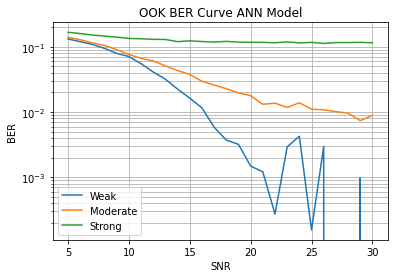

In [ ]:
import matplotlib.pyplot as plot
import numpy as np


plot.grid(True, which="both")
legend = []
for h in y_data.keys():
  plot.semilogy(x_data[:len(y_data[h])],y_data[h])
  legend.append(h)

plot.legend(legend) 
plot.title('OOK BER Curve ANN Model')
plot.xlabel('SNR')
plot.ylabel('BER')

plot.show()

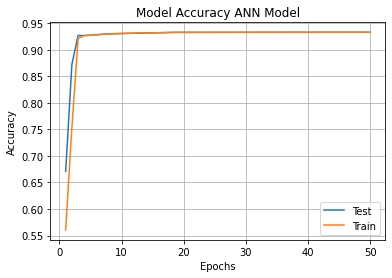

In [ ]:
import matplotlib.pyplot as plot
import numpy as np

eps = 50
plot.grid(True, which="both")
plot.plot(range(1,eps+1),history.history['val_accuracy'])
plot.plot(range(1,eps+1),history.history['accuracy'])
plot.legend(['Test', "Train"])
plot.title('Model Accuracy ANN Model')
plot.xlabel('Epochs')
plot.ylabel('Accuracy')

plot.show()

In [ ]:
ann.save("model_ann.h5")

In [ ]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512, 5)            10        
                                                                 
 dense_4 (Dense)             (None, 512, 5)            30        
                                                                 
 dense_5 (Dense)             (None, 512, 2)            12        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Threshold Model
thresh = []
for i in range(1300):
  mean = np.mean(X_test[i+1300])
  dt = X_test[i+1300] > mean
  #print(dt)
  #print(X_test[i].shape)
  x = np.bitwise_xor(dt[:,0],Y_test[i+1300][:,0])
  #print("dt =", dt[:,0])
  #print("Y_test = ",Y_test[i][:,0])
  err += sum(x)
  #print(err)
  if ((i+1300)%50 == 49):
    #print(err)
    thresh.append(err/(50*512))
    err = 0
thresh

[0.139140625,
 0.127421875,
 0.11359375,
 0.10421875,
 0.0892578125,
 0.0763671875,
 0.0666796875,
 0.0612890625,
 0.050234375,
 0.0421875,
 0.0381640625,
 0.03046875,
 0.02515625,
 0.0233203125,
 0.02015625,
 0.0190625,
 0.013125,
 0.0147265625,
 0.0123828125,
 0.014375,
 0.011875,
 0.01078125,
 0.010703125,
 0.00984375,
 0.007109375,
 0.0106640625]

In [ ]:
#Comparison of various models for each turbulence
df1 = pd.read_csv('model1_metadata.csv')
df2 = pd.read_csv('model2_metadata.csv')
df3 = pd.read_csv('model3_metadata.csv')
y_data = {"ANN Model":[],"FC Model":[],"FCNN Model":[],"Threshold Model":[]}
for i in range(len(df1["Moderate"])):
  y_data["ANN Model"].append(df1["Moderate"][i])
for i in range(len(df2["Moderate"])):
  y_data["FC Model"].append(df2["Moderate"][i])
for i in range(len(df3["Moderate"])):
  y_data["FCNN Model"].append(df3["Moderate"][i])
y_data["Threshold Model"] = thresh
y_data

{'ANN Model': [0.1399609375,
  0.1289453125,
  0.1159765625,
  0.106171875,
  0.0903515625,
  0.0766796875,
  0.0675,
  0.0615625,
  0.052734375,
  0.0438671875,
  0.037890625,
  0.0303515625,
  0.026328125,
  0.0235546875,
  0.0190234375,
  0.0184765625,
  0.013359375,
  0.01328125,
  0.0121875,
  0.0135546875,
  0.011328125,
  0.011640625,
  0.0101953125,
  0.01,
  0.0080078125,
  0.0084765625],
 'FC Model': [0.13984375,
  0.1286328125,
  0.1148046875,
  0.1053515625,
  0.090078125,
  0.0762109375,
  0.06703125,
  0.0609765625,
  0.0515625,
  0.04375,
  0.0378125,
  0.029765625,
  0.0257421875,
  0.023046875,
  0.0193359375,
  0.0176953125,
  0.0133984375,
  0.013359375,
  0.011640625,
  0.01359375,
  0.0110546875,
  0.01125,
  0.0101953125,
  0.00984375,
  0.0077734375,
  0.008515625],
 'FCNN Model': [0.060234375,
  0.041953125,
  0.0279296875,
  0.015,
  0.0092578125,
  0.0052734375,
  0.002109375,
  0.0010546875,
  0.000390625,
  0.0001171875,
  7.8125e-05,
  7.8125e-05,
  3.90625

In [ ]:
#FLOPs calculation
def get_flops(model_h5_path):
    session = tf.compat.v1.Session()
    graph = tf.compat.v1.get_default_graph()
        

    with graph.as_default():
        with session.as_default():
            model = tf.keras.models.load_model(model_h5_path)

            run_meta = tf.compat.v1.RunMetadata()
            opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
        
            # We use the Keras session graph in the call to the profiler.
            flops = tf.compat.v1.profiler.profile(graph=graph,
                                                  run_meta=run_meta, cmd='op', options=opts)
        
            return flops.total_float_ops

In [ ]:
tf.compat.v1.reset_default_graph()
get_flops('model_512.h5')

507128

In [ ]:
import itertools
import pickle
import torch
import os
import random
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(400)
np.random.seed(400)

#torch.cuda.set_device(1)

class Data(Dataset):
    def __init__(self,x,y):

        self.x=x
        self.y=y
        self.size=len(x)

    @classmethod
    def getReader(cls,type='train'):
      Samp_sel = pd.read_csv('Samp_sel.csv').values
      bit_pattern = pd.read_csv('btp.csv').values
      '''if(type=="train"):
        Samp_sel = Samp_sel[0:7000,:]
        bit_pattern = bit_pattern[0:7000,:]
      else:
        Samp_sel = Samp_sel[7000:,:]
        bit_pattern = bit_pattern[7000:,:]
      #print(Samp_sel.shape)
      #print(bit_pattern.shape)'''
      return Samp_sel,bit_pattern

    def __getitem__(self,idx):
      
      x=self.x[idx]
      y=self.y[idx]
      curr = torch.zeros((y.shape[0],2))
      #print(curr)
      for i,num in enumerate(y):
        num=num.item()
        if num == 0:
            curr[i] = torch.tensor([1,0])
        else:
            curr[i] = torch.tensor([0, 1])
      #print(curr)

      return x,curr

    def __len__(self):
        return self.size


def getLoaders(batch_size=10):
    print('Reading the training Dataset...')
    print()
    X, Y = Data.getReader(type='train') #19200 #21216
    
    print('Reading the validation Dataset...')
    print()
    #valid_dataset = Data.getReader(type='val') #23200 #25216

    
    #trainloader = DataLoader(dataset=train_dataset, batch_size = batch_size, num_workers=0,shuffle=True)

    #validloader = DataLoader(dataset=valid_dataset, batch_size = batch_size, num_workers=0,shuffle=True)
   
    return X, Y
X, Y = getLoaders()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=42)
'''for x,y in train:
  print(x.shape)
  print(y.shape)'''
for x,y in val:
  #print(x.shape)
  print("HI")
  print(y)

Reading the training Dataset...



FileNotFoundError: ignored